Importing and Installing Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Key-points detection using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False # Image is no longerwriteable
    results = model.process(image) # Make prediction
    image.flags.writeable = True # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

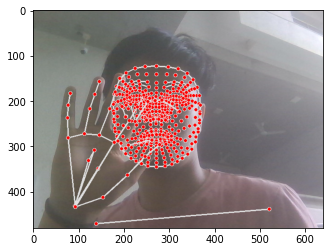

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extracting Key Points

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
if results.face_landmarks:
    print()
else:
    np.zeros(1404)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
np.save('0', result_test)

Setting up folder for collection of video frames

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collecting key-points values for training and testing

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

Preprocessing Data and creating labels and features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
X = np.array(sequences)

In [22]:
y = to_categorical(labels).astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

Building and Training LSTM Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [25]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [26]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', 
input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [27]:
res = [.7, 0.2, 0.1]

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 86ms/step - loss: 1.5903 - categorical_accuracy: 0.1765
Epoch 2/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.0464 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.5523 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 0s 104ms/step - loss: 38.5469 - categorical_accuracy: 0.1882
Epoch 5/2000
3/3 [==============================] - 0s 107ms/step - loss: 15.6832 - categorical_accuracy: 0.4235
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 13.1353 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 102ms/step - loss: 20.4594 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 97ms/step - loss: 12.7446 - categorical_accuracy: 0.4353
Epoch 9/2000
3/3 [==============================] - 0s 92ms/step - loss: 9.5951 - categorical_accuracy: 

3/3 [==============================] - 0s 89ms/step - loss: 0.1898 - categorical_accuracy: 0.9882
Epoch 146/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1630 - categorical_accuracy: 0.9882
Epoch 147/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1381 - categorical_accuracy: 0.9882
Epoch 148/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1327 - categorical_accuracy: 0.9882
Epoch 149/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1365 - categorical_accuracy: 0.9882
Epoch 150/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1154 - categorical_accuracy: 0.9882
Epoch 151/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1392 - categorical_accuracy: 0.9882
Epoch 152/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1247 - categorical_accuracy: 0.9882
Epoch 153/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1182 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 90ms/step - loss: 0.0551 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0548 - categorical_accuracy: 0.9882
Epoch 291/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0505 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0545 - categorical_accuracy: 0.9882
Epoch 293/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0535 - categorical_accuracy: 0.9882
Epoch 294/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0521 - categorical_accuracy: 0.9882
Epoch 295/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0580 - categorical_accuracy: 0.9882
Epoch 296/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0547 - categorical_accuracy: 0.9882
Epoch 297/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0651 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 99ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 434/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0516 - categorical_accuracy: 0.9882
Epoch 435/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0538 - categorical_accuracy: 0.9882
Epoch 436/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0536 - categorical_accuracy: 0.9882
Epoch 437/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0560 - categorical_accuracy: 0.9882
Epoch 438/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0531 - categorical_accuracy: 0.9882
Epoch 439/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0593 - categorical_accuracy: 0.9882
Epoch 440/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0529 - categorical_accuracy: 0.9882
Epoch 441/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0535 - categorical_accuracy:

3/3 [==============================] - 0s 161ms/step - loss: 0.0508 - categorical_accuracy: 0.9882
Epoch 578/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 579/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.0518 - categorical_accuracy: 0.9882
Epoch 580/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0524 - categorical_accuracy: 0.9882
Epoch 581/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 582/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0497 - categorical_accuracy: 0.9882
Epoch 583/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0503 - categorical_accuracy: 0.9882
Epoch 584/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0507 - categorical_accuracy: 0.9882
Epoch 585/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0524 - categorical_accura

3/3 [==============================] - 0s 96ms/step - loss: 0.0579 - categorical_accuracy: 0.9882
Epoch 650/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0512 - categorical_accuracy: 0.9882
Epoch 651/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0559 - categorical_accuracy: 0.9882
Epoch 652/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0493 - categorical_accuracy: 0.9882
Epoch 653/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0677 - categorical_accuracy: 0.9882
Epoch 654/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0728 - categorical_accuracy: 0.9882
Epoch 655/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0711 - categorical_accuracy: 0.9882
Epoch 656/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0573 - categorical_accuracy: 0.9882
Epoch 657/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0484 - categorical_accuracy:

3/3 [==============================] - 0s 95ms/step - loss: 0.0517 - categorical_accuracy: 0.9882
Epoch 794/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0495 - categorical_accuracy: 0.9882
Epoch 795/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0554 - categorical_accuracy: 0.9882
Epoch 796/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0505 - categorical_accuracy: 0.9882
Epoch 797/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0505 - categorical_accuracy: 0.9882
Epoch 798/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0495 - categorical_accuracy: 0.9882
Epoch 799/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.0470 - categorical_accuracy: 0.9882
Epoch 800/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0681 - categorical_accuracy: 0.9882
Epoch 801/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0557 - categorical_accuracy:

3/3 [==============================] - 0s 91ms/step - loss: 0.1114 - categorical_accuracy: 0.9882
Epoch 866/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1123 - categorical_accuracy: 0.9882
Epoch 867/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1020 - categorical_accuracy: 0.9882
Epoch 868/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1004 - categorical_accuracy: 0.9882
Epoch 869/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0963 - categorical_accuracy: 0.9882
Epoch 870/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1014 - categorical_accuracy: 0.9882
Epoch 871/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1069 - categorical_accuracy: 0.9882
Epoch 872/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0928 - categorical_accuracy: 0.9882
Epoch 873/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1176 - categorical_accuracy: 0.9

3/3 [==============================] - 0s 107ms/step - loss: 0.0515 - categorical_accuracy: 0.9882
Epoch 1010/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0459 - categorical_accuracy: 0.9882
Epoch 1011/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0526 - categorical_accuracy: 0.9882
Epoch 1012/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 1013/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 1014/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0456 - categorical_accuracy: 0.9882
Epoch 1015/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0430 - categorical_accuracy: 0.9882
Epoch 1016/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0536 - categorical_accuracy: 0.9882
Epoch 1017/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0415 - categorical_acc

3/3 [==============================] - 0s 118ms/step - loss: 0.0171 - categorical_accuracy: 0.9882
Epoch 1152/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0341 - categorical_accuracy: 0.9882
Epoch 1153/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0514 - categorical_accuracy: 0.9765
Epoch 1154/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0282 - categorical_accuracy: 0.9882
Epoch 1155/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0631 - categorical_accuracy: 0.9882
Epoch 1156/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0804 - categorical_accuracy: 0.9882
Epoch 1157/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1948 - categorical_accuracy: 0.9059
Epoch 1158/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.1839 - categorical_accuracy: 0.9529
Epoch 1159/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.1432 - categorica

3/3 [==============================] - 0s 98ms/step - loss: 0.1189 - categorical_accuracy: 0.9882
Epoch 1294/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1231 - categorical_accuracy: 0.9882
Epoch 1295/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0882 - categorical_accuracy: 0.9882
Epoch 1296/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0725 - categorical_accuracy: 0.9882
Epoch 1297/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0401 - categorical_accuracy: 0.9882
Epoch 1298/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0579 - categorical_accuracy: 0.9882
Epoch 1299/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0590 - categorical_accuracy: 0.9882
Epoch 1300/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0507 - categorical_accuracy: 0.9882
Epoch 1301/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0339 - categorical_accurac

3/3 [==============================] - 0s 123ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1436/2000
3/3 [==============================] - 1s 131ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1437/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1438/2000
3/3 [==============================] - 0s 127ms/step - loss: 9.8079e-04 - categorical_accuracy: 1.0000
Epoch 1439/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1440/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 1441/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1442/2000
3/3 [==============================] - 0s 102ms/step - loss: 9.9078e-04 - categorical_accuracy: 1.0000
Epoch 1443/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0012 - ca

3/3 [==============================] - 0s 102ms/step - loss: 1.0817 - categorical_accuracy: 0.3294
Epoch 1577/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0809 - categorical_accuracy: 0.3647
Epoch 1578/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0836 - categorical_accuracy: 0.6000
Epoch 1579/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0809 - categorical_accuracy: 0.6471
Epoch 1580/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0816 - categorical_accuracy: 0.6471
Epoch 1581/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0810 - categorical_accuracy: 0.5765
Epoch 1582/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0807 - categorical_accuracy: 0.4471
Epoch 1583/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0812 - categorical_accuracy: 0.3294
Epoch 1584/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0810 - categorical_ac

3/3 [==============================] - 0s 112ms/step - loss: 0.9943 - categorical_accuracy: 0.6706
Epoch 1719/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9864 - categorical_accuracy: 0.7059
Epoch 1720/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.9986 - categorical_accuracy: 0.5294
Epoch 1721/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.9600 - categorical_accuracy: 0.7882
Epoch 1722/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.9765 - categorical_accuracy: 0.6118
Epoch 1723/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9770 - categorical_accuracy: 0.5294
Epoch 1724/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9676 - categorical_accuracy: 0.5529
Epoch 1725/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9653 - categorical_accuracy: 0.5647
Epoch 1726/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.9473 - categorical_a

3/3 [==============================] - 0s 113ms/step - loss: 0.5263 - categorical_accuracy: 0.8000
Epoch 1861/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5134 - categorical_accuracy: 0.8118
Epoch 1862/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4963 - categorical_accuracy: 0.8353
Epoch 1863/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5171 - categorical_accuracy: 0.8235
Epoch 1864/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5492 - categorical_accuracy: 0.7412
Epoch 1865/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5681 - categorical_accuracy: 0.7765
Epoch 1866/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4892 - categorical_accuracy: 0.8235
Epoch 1867/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.4853 - categorical_accuracy: 0.8235
Epoch 1868/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4964 - categorical_acc

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

Making Predictions

In [30]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


Save Weights

In [31]:
model.save('action.h5')
model.load_weights('action.h5')

Evaluation using confusion matrix and accuracy

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [33]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [34]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [35]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[2, 0],
        [3, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [36]:
accuracy_score(ytrue, yhat)

0.2

Testing in real time

In [37]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [38]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [40]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 54ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
iloveyou


In [41]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))